Business and Data Understanding:
- Stakeholders: Mt. Sinai's telemedicine targets pre-diabetics through preventive monitoring.
- Regular check-ins with healthcare providers, including self-management classes, nutrition counseling, and prevention programs, can help reduce readmissions.
- Early diabetes monitoring can allow for quick action. Regular preventative monitoring can reduce diabetes risk. Closely tracking and analyzing indicators helps prompt necessary preventative measures.

Business objectives:
- Mt. Sinai has a limited staff and equipment to serve those at-risk.
- Targeted preventative measures should be implemented for those individuals who are most likely to become afflicted with the disease.
- How can Mt. Sinai target at-risk patients? Develop a classification model to identify at-risk diabetics using known impactors such as BMI, age, diet and other data from phone screening.

Data understanding:
- There are two Datasets used in this study: diabetes_012_health_indicators_BRFSS2015.csv and diabetes_binary_5050split_health_indicators_BRFSS2015.csv
- The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. These are a subset of features and rows of this total collection.
- diabetes_012_health_indicators_BRFSS2015.csv has 253,680 survey responses. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes, 1 is for prediabetes, and 2 is for diabetes. This dataset has 21 features of binned categories into discrete variables. For example, 'HighBP' is already binned into binary variables where
0 = not high and BP 1 = high BP.
- Target variable: Diabetes_012 multiclass target where 0 = no diabetes, 1 = prediabetes and 2 = diabetes.
-  diabetes_binary_5050split_health_indicators_BRFSS2015.csv has 70692 survey respondents undersampling the majority class from the original dataset by the original source of the data
- Target variable: Diabetes_binary is binary target where 0 = no diabetes, 1 = prediabetes or diabetes.

In [ ]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats
from scipy.special import logit, expit

# SKLearn Modules
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, log_loss, confusion_matrix, RocCurveDisplay, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler

# imbalanced-learn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

# Dataset
from sklearn import datasets

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [ ]:
# Load the dataset into a pandas DataFrame
df_large = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
df_large.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Check the size and shape of the dataset
print('Dataset size:', df_large.size)
print('Dataset shape:', df_large.shape)

# Check for missing or null values
print('Number of missing or null values:', df_large.isnull().sum().sum())

# Check for duplicate rows or columns
print('Number of duplicate rows:', df_large.duplicated().sum())

Dataset size: 5580960
Dataset shape: (253680, 22)
Number of missing or null values: 0
Number of duplicate rows: 23899


No missing values. We can assume due to the lack of ID column and the way the dataset is already binned, that the duplicates are simply matching values but not actual duplicates.

In [ ]:
# change ordinal features to uint8 type

df_large = df_large.astype({'Diabetes_012':'uint8',
     'HighBP':'uint8',
     'HighChol':'uint8',
     'CholCheck':'uint8',
     'Smoker':'uint8',
     'Stroke':'uint8',
     'HeartDiseaseorAttack':'uint8',
     'PhysActivity':'uint8',
     'Fruits':'uint8',
     'Veggies':'uint8',
     'HvyAlcoholConsump':'uint8',
     'AnyHealthcare':'uint8',
     'NoDocbcCost':'uint8',
     'GenHlth':'uint8',
     'MentHlth':'uint8',
     'PhysHlth':'uint8',
     'DiffWalk':'uint8',
     'Sex':'uint8',
     'Age':'uint8',
     'Education':'uint8',
     'Income':'uint8'})

In [ ]:
class_counts = df_large['Diabetes_012'].value_counts()
print(class_counts)

0    213703
2     35346
1      4631
Name: Diabetes_012, dtype: int64


Yes, there is a class imbalance. Class 0 has a significantly larger number of samples compared to classes 1 and 2. We will undersample the major and also utilize SMOTE later.


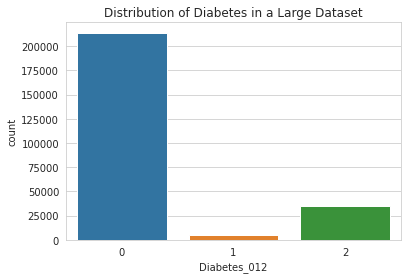

In [ ]:
# check distribution of target
import seaborn as sns

sns.set_style("whitegrid")  # set style to whitegrid
sns.countplot(x='Diabetes_012', data=df_large)

plt.title("Distribution of Diabetes in a Large Dataset")  # add title to the plot
plt.show()  # show the plot


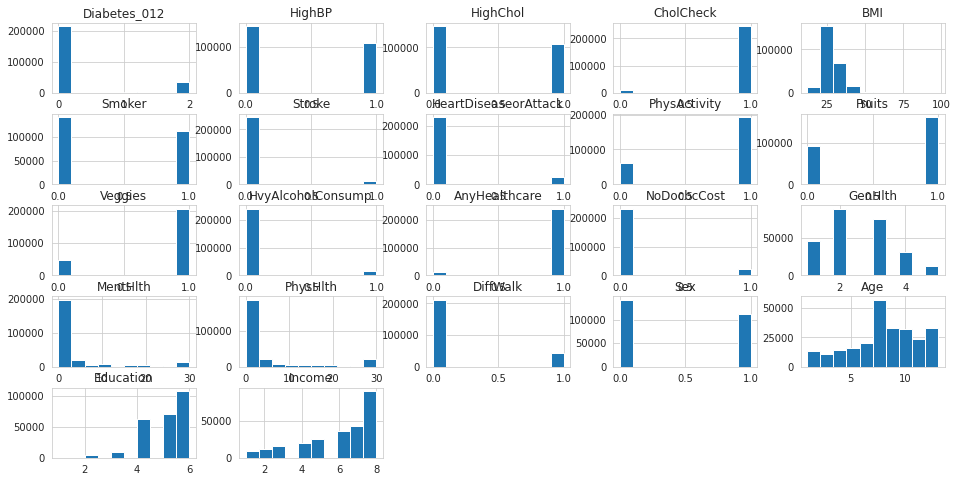

In [ ]:
# create histograms for all features to examine spread
df_large.hist(bins=10, figsize=(16, 8))
plt.show()

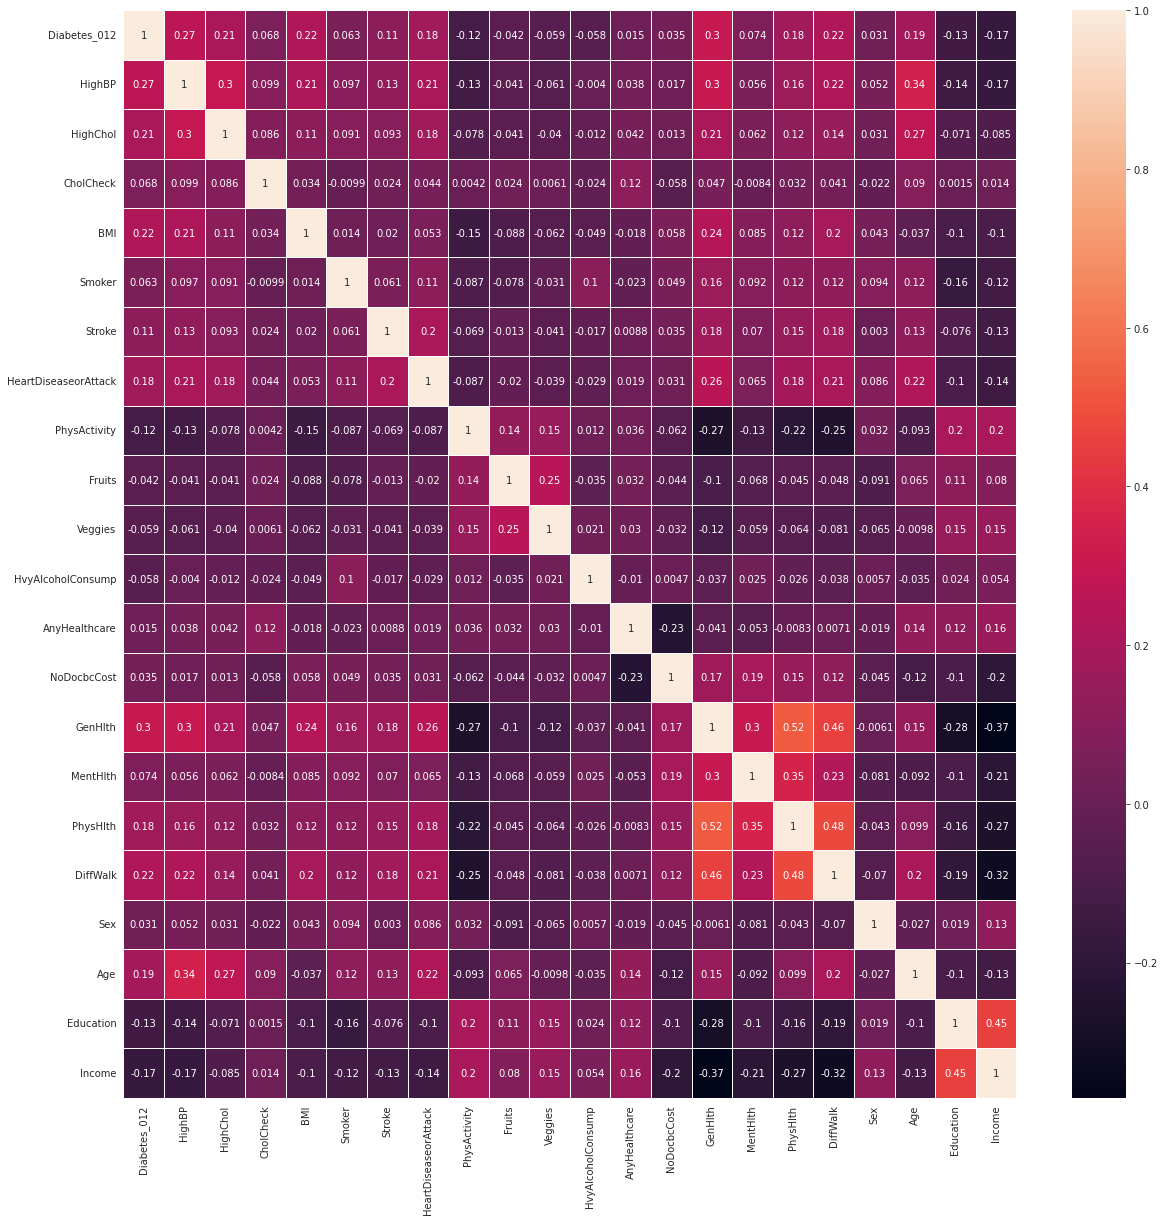

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_large.corr(),linewidths=0.5,annot=True)
plt.show()

In [ ]:
df_large.corr().sort_values('Diabetes_012')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Income,-0.171483,-0.171235,-0.085459,0.014259,-0.100069,-0.123937,-0.128599,-0.141011,0.198539,0.079929,...,0.157999,-0.203182,-0.370014,-0.209806,-0.266799,-0.320124,0.127141,-0.127775,0.449106,1.000000
Education,-0.130517,-0.141358,-0.070802,0.001510,-0.103932,-0.161955,-0.076009,-0.099600,0.199658,0.110187,...,0.122514,-0.100701,-0.284912,-0.101830,-0.155093,-0.192642,0.019480,-0.101901,1.000000,0.449106
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Veggies,-0.058972,-0.061266,-0.039874,0.006121,-0.062275,-0.030678,-0.041124,-0.039167,0.153150,0.254342,...,0.029584,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.154329,0.151087
HvyAlcoholConsump,-0.057882,-0.003972,-0.011543,-0.023730,-0.048736,0.101619,-0.016950,-0.028991,0.012392,-0.035288,...,-0.010488,0.004684,-0.036724,0.024716,-0.026415,-0.037668,0.005740,-0.034578,0.023997,0.053619
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929
AnyHealthcare,0.015410,0.038425,0.042230,0.117626,-0.018471,-0.023251,0.008776,0.018734,0.035505,0.031544,...,1.000000,-0.232532,-0.040817,-0.052707,-0.008276,0.007074,-0.019405,0.138046,0.122514,0.157999
Sex,0.031040,0.052207,0.031205,-0.022115,0.042950,0.093662,0.002978,0.086096,0.032482,-0.091175,...,-0.019405,-0.044931,-0.006091,-0.080705,-0.043137,-0.070299,1.000000,-0.027340,0.019480,0.127141
NoDocbcCost,0.035436,0.017358,0.013310,-0.058255,0.058206,0.048946,0.034804,0.031000,-0.061638,-0.044243,...,-0.232532,1.000000,0.166397,0.192107,0.148998,0.118447,-0.044931,-0.119777,-0.100701,-0.203182
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937


High negative correlations:
- Income, Education, PhysActivity 

Highest positive correlations:  
- GenHlth, HighBP, DiffWalk,BMI 

In [ ]:
# Filter the DataFrame to keep only rows where Diabetes_012 is 0, 1, or 2
df_filtered = df_large[df_large['Diabetes_012'].isin([0, 1, 2])]

# Separate the majority and minority classes based on the value of the target variable
df_majority = df_filtered[df_filtered['Diabetes_012'] == 0]
df_minority = df_filtered[df_filtered['Diabetes_012'].isin([1, 2])]

# Undersample the majority class (Diabetes_012 == 0) to balance the dataset
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine the minority class with the downsampled majority class to create the final dataset
df_downsampled = pd.concat([df_majority_downsampled, df_minority])



We are undersampling the majority class 0 and keeping all rows for the minority class. Randomly selecting the matching length of minority class from majority dataframe.

In [ ]:
df_downsampled.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
162288,0,0,0,1,24.0,0,0,0,0,0,...,1,0,4,0,15,1,0,9,5,5
227646,0,1,0,1,32.0,1,0,0,1,1,...,1,0,3,0,0,0,0,8,6,8
888,0,1,1,1,28.0,0,0,0,1,1,...,1,0,3,1,0,0,0,9,6,6
230094,0,1,1,1,28.0,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8
134829,0,0,0,1,35.0,0,0,0,0,0,...,1,0,3,10,2,0,0,6,4,8


In [ ]:
class_counts = df_downsampled['Diabetes_012'].value_counts()
print(class_counts)

0.0    29342
2.0    25889
1.0     3453
Name: Diabetes_012, dtype: int64


In [ ]:
df = df_downsampled

Basic logistic regression will be our basline model. We will score for macro recall because of multiclass classification and wanting to account for positive instances of our target for our minority class '1'. 

In [ ]:
# Basic logistic regression model

# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
clf = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=50)

# Fit the logistic regression model on the training data
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)


# Evaluate the accuracy of the predictions
accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test recall score: {recall:.3f}')



Test accuracy: 0.692
Test recall score: 0.489


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


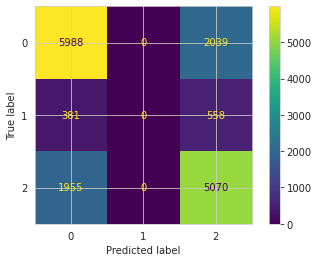

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      8027
           1       0.00      0.00      0.00       939
           2       0.66      0.72      0.69      7025

    accuracy                           0.69     15991
   macro avg       0.46      0.49      0.47     15991
weighted avg       0.65      0.69      0.67     15991



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')


Add a parameter grid search with SMOTE for minority and standard scaler to improve the model.

In [ ]:
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV


# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Define the parameter grid
param_grid = {
    'clf__penalty': ['l1', 'l2', 'none'],
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['saga'],
    'clf__max_iter': [100, 1000]
}


# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')


# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')


# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test recall score: {recall:.3f}')



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

Best hyperparameters: {'clf__C': 10, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Best cross-validated recall score: 0.498
Test accuracy: 0.583
Test recall score: 0.498


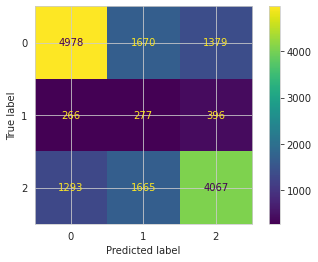

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      8027
           1       0.08      0.29      0.12       939
           2       0.70      0.58      0.63      7025

    accuracy                           0.58     15991
   macro avg       0.51      0.50      0.48     15991
weighted avg       0.69      0.58      0.63     15991



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')


In [ ]:
# Extract the logistic regression estimator from the pipeline
lr = pipeline.named_steps['clf']

# Get the feature names
feature_names = X_train.columns.tolist()

# Get the coefficients and sort them by absolute value
coef = lr.coef_[0]
coef_abs = np.abs(coef)
sorted_idx = coef_abs.argsort()[::-1]

# Print the feature importances
print("Feature importances:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {coef[i]:.4f}")

Feature importances:
BMI: -0.3659
Age: -0.3316
GenHlth: -0.2675
HvyAlcoholConsump: 0.1457
Income: 0.1368
HighBP: -0.1323
DiffWalk: 0.1232
HighChol: -0.1225
CholCheck: -0.1062
Fruits: 0.0982
Education: 0.0951
Smoker: 0.0934
PhysActivity: 0.0894
NoDocbcCost: 0.0828
Stroke: 0.0778
Veggies: 0.0528
AnyHealthcare: 0.0524
HeartDiseaseorAttack: 0.0499
Sex: 0.0462
MentHlth: -0.0265
PhysHlth: -0.0190


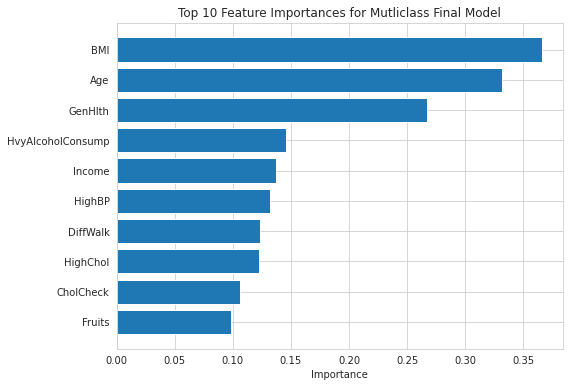

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 feature importances
n_features = 10
top_features = coef_abs[sorted_idx][:n_features]
top_feature_names = np.array(feature_names)[sorted_idx][:n_features]

# Plot the feature importances
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_feature_names, top_features)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Top {} Feature Importances for Mutliclass Logistic Model'.format(n_features))
plt.show()


Utilize KBest features for logistic regression model.

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler and feature selection
pipeline_fs = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority')),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', LogisticRegression())
])

# Define the parameter grid for grid search
param_grid_fs = {
    'select__k': [5, 10, 15, 20],
    'clf__penalty': ['l1', 'l2', 'none'],
    'clf__C': [ 0.1],
    'clf__solver': ['saga'],
    'clf__max_iter': [100, 1000]
}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search_fs = GridSearchCV(pipeline_fs, param_grid=param_grid_fs, cv=5, scoring=scorer)
grid_search_fs.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline_fs.set_params(**grid_search_fs.best_params_)
pipeline_fs.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_fs = pipeline_fs.predict(X_test)


# Evaluate the accuracy of the predictions
accuracy = pipeline_fs.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred_fs, average='macro')
print(f'Test recall score: {recall:.3f}')



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

Best hyperparameters: {'clf__C': 10, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Best cross-validated recall score: 0.498
Test accuracy: 0.576
Test recall score: 0.503


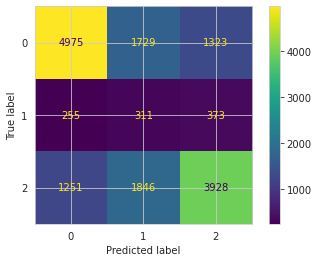

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      8027
           1       0.08      0.29      0.12       939
           2       0.70      0.58      0.63      7025

    accuracy                           0.58     15991
   macro avg       0.51      0.50      0.48     15991
weighted avg       0.69      0.58      0.63     15991



In [ ]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_fs)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

K features doesn't do any better than the original LR model.

RandomForest classifier with randomsearch, standard scaler and SMOTE in pipeline.

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the pipeline with SMOTE, Random Forest Classifier, and StandardScaler
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])


# Define the parameter space to search
param_dist = {"clf__max_depth": [3, 5, 10, 20],
              "clf__max_features": [int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1]/2)), 5, 3],
              "clf__n_estimators": [50, 100, 200, 500],
              "clf__criterion": ["gini", "entropy"]}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, 
                                   random_state=42, n_jobs=-1, scoring=scorer)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline with the best hyperparameters on the training data
pipeline.set_params(**random_search.best_params_)
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test recall score: {recall:.3f}')


Best hyperparameters: {'clf__C': 10, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Best cross-validated recall score: 0.498
Test accuracy: 0.616
Test recall score: 0.507


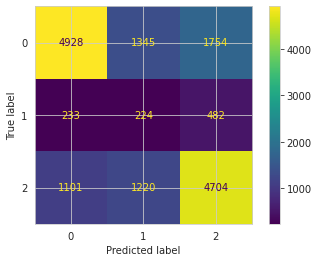

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69      8027
           1       0.08      0.24      0.12       939
           2       0.68      0.67      0.67      7025

    accuracy                           0.62     15991
   macro avg       0.52      0.51      0.49     15991
weighted avg       0.70      0.62      0.65     15991



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

In [ ]:
# Get the feature importances
rf_feature_importances = pd.DataFrame(zip(X_train.columns, pipeline.named_steps['clf'].feature_importances_))
rf_feature_importances = rf_feature_importances.sort_values(by=1, ascending=False)
rf_feature_importances.columns = ['feature', 'importance']

# Print the top 10 features by importance
print(rf_feature_importances.head(10))

                 feature  importance
3                    BMI    0.146695
13               GenHlth    0.144938
0                 HighBP    0.126843
18                   Age    0.093538
20                Income    0.071277
19             Education    0.046405
16              DiffWalk    0.045741
1               HighChol    0.041834
7           PhysActivity    0.041159
6   HeartDiseaseorAttack    0.038430


Utilize a bagging model with DecisionTree as my base estimator and grid search for optimal params. 

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Perform the grid search with recall-score as the scoring metric
grid_search = GridSearchCV(bagging_clf, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')


# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Fit the base estimator with the training data
base_estimator.fit(X_train, y_train)

# Define the bagging classifier with the base estimator
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Fit the bagging classifier on the training data with the best hyperparameters
bagging_clf.set_params(**grid_search.best_params_)
bagging_clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = bagging_clf.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred,average='macro')
print(f'Test recall score: {recall:.3f}')


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

Best hyperparameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 100}
Best cross-validated recall score: 0.498


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test accuracy: 0.699
Test recall score: 0.495


In [ ]:

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Fit the base estimator with the training data
base_estimator.fit(X_train, y_train)

# Define the bagging classifier with the base estimator
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Fit the bagging classifier on the training data with the best hyperparameters
bagging_clf.set_params(**grid_search.best_params_)
bagging_clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = bagging_clf.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred,average='macro')
print(f'Test recall score: {recall:.3f}')


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test accuracy: 0.698
Test recall score: 0.494


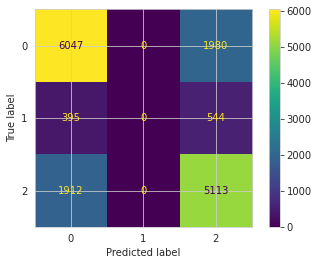

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      8027
           1       0.00      0.00      0.00       939
           2       0.67      0.73      0.70      7025

    accuracy                           0.70     15991
   macro avg       0.46      0.49      0.48     15991
weighted avg       0.66      0.70      0.68     15991



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

In [ ]:
import pandas as pd

# Get the feature importances from the base estimator
importances = bagging_clf.base_estimator_.feature_importances_

# Create a DataFrame with feature importances
df_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance value in descending order
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(df_importances)




                 Feature  Importance
3                    BMI    0.136424
0                 HighBP    0.120497
18                   Age    0.105641
20                Income    0.093366
13               GenHlth    0.087806
15              PhysHlth    0.075806
19             Education    0.066330
14              MentHlth    0.058330
8                 Fruits    0.034194
4                 Smoker    0.033318
17                   Sex    0.030371
7           PhysActivity    0.028324
9                Veggies    0.025829
16              DiffWalk    0.020937
1               HighChol    0.016911
6   HeartDiseaseorAttack    0.016687
12           NoDocbcCost    0.013585
5                 Stroke    0.012206
10     HvyAlcoholConsump    0.009568
11         AnyHealthcare    0.008843
2              CholCheck    0.005028


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Utilize KNN model with SelectKBest features and grid search.

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE, StandardScaler, feature selection, and KNN
pipeline_knn = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority')),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', KNeighborsClassifier())
])

# Define the parameter grid for grid search
param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__leaf_size': [10, 30, 50],
    'clf__p': [1, 2]
}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=5, scoring=scorer)
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search_knn.best_params_}')
print(f'Best cross-validated recall score: {grid_search_knn.best_score_:.3f}')

# Predict the target variable
pipeline_knn.set_params(**grid_search_knn.best_params_)
pipeline_knn.fit(X_train, y_train)

#Predict the target variable for the test data
y_pred_knn = pipeline_knn.predict(X_test)

#Evaluate the accuracy of the predictions
accuracy_knn = pipeline_knn.score(X_test, y_test)
print(f'Test accuracy with KNN: {accuracy_knn:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred,average='macro')
print(f'Test recall score with KNN: {recall:.3f}')


Best hyperparameters: {'clf__leaf_size': 10, 'clf__n_neighbors': 7, 'clf__p': 2, 'clf__weights': 'uniform'}
Best cross-validated recall score: 0.468
Test accuracy with KNN: 0.547
Test recall score with KNN: 0.494


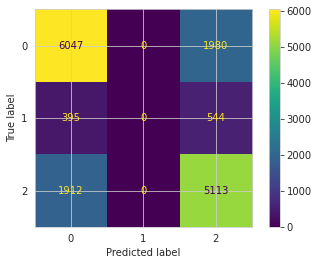

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      8027
           1       0.00      0.00      0.00       939
           2       0.67      0.73      0.70      7025

    accuracy                           0.70     15991
   macro avg       0.46      0.49      0.48     15991
weighted avg       0.66      0.70      0.68     15991



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

Utilize XGBoost 

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler and XGBoost classifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', xgb.XGBClassifier(objective='multi:softmax', num_class=3))
])


# Define the parameter grid for grid search
param_grid = {
    'clf__learning_rate': [0.01, 0.1, 1],
    'clf__max_depth': [3, 5, 7],
    'clf__n_estimators': [50, 100]
}


# Define the scoring metric
scorer = make_scorer(recall_score,average='macro')

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred,average='macro')
print(f'Test recall score: {recall:.3f}')


Best hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 100}
Best cross-validated recall score: 0.711
Test accuracy: 0.708
Test recall score: 0.502


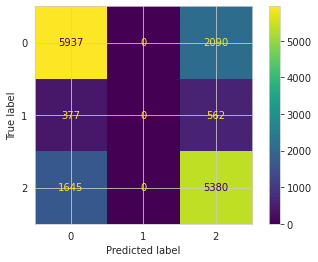

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      8027
           1       0.00      0.00      0.00       939
           2       0.67      0.77      0.71      7025

    accuracy                           0.71     15991
   macro avg       0.47      0.50      0.49     15991
weighted avg       0.67      0.71      0.69     15991



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

Utilize AdaBoostClassifier with standard scaler and gridsearch.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler, SMOTE, and AdaBoost classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', AdaBoostClassifier(random_state=42))
])

# Define the parameter grid for grid search
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1]
}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)

# Generate the predicted labels for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test recall score: {recall:.3f}')


Best hyperparameters: {'clf__learning_rate': 1, 'clf__n_estimators': 200}
Best cross-validated recall score: 0.501
Test accuracy: 0.697
Test recall score: 0.495


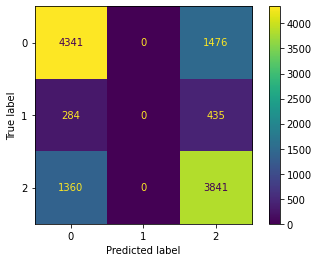

Classification report:
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74      5817
         1.0       0.00      0.00      0.00       719
         2.0       0.67      0.74      0.70      5201

    accuracy                           0.70     11737
   macro avg       0.46      0.49      0.48     11737
weighted avg       0.66      0.70      0.68     11737



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

BMI: 0.450
Age: 0.145
PhysHlth: 0.115
Income: 0.050
MentHlth: 0.050
GenHlth: 0.045
Education: 0.030
HighBP: 0.020
NoDocbcCost: 0.010
DiffWalk: 0.010
Sex: 0.010
CholCheck: 0.010
HighChol: 0.010
HvyAlcoholConsump: 0.010
AnyHealthcare: 0.005
Veggies: 0.005
Fruits: 0.005
PhysActivity: 0.005
HeartDiseaseorAttack: 0.005
Stroke: 0.005
Smoker: 0.005


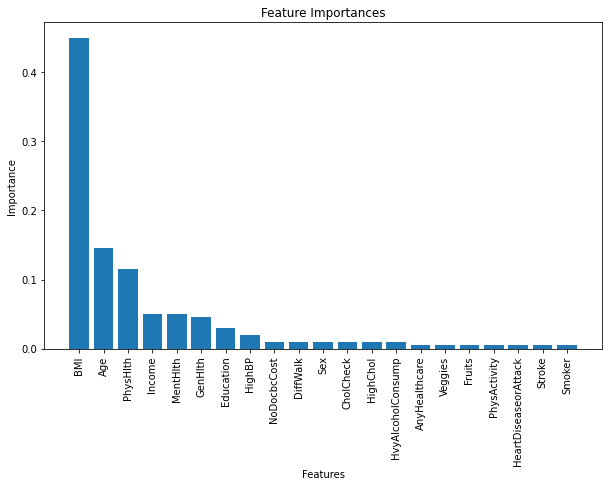

In [ ]:
import matplotlib.pyplot as plt

# Get the feature importances from the fitted classifier
importances = pipeline.named_steps['clf'].feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by their importance
sorted_indices = importances.argsort()[::-1]

# Print the feature importances
for i in sorted_indices:
    print(f'{feature_names[i]}: {importances[i]:.3f}')

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names[sorted_indices], importances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


Utilize GradientBoost classifier with SMOTE, column transformer on standard scaler for numeric columns and gridsearch.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, make_scorer, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.compose import make_column_selector as selector

# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(random_state=42)

pipeline = ImbPipeline([
    ('preprocessing', ColumnTransformer([
        ('scaler', StandardScaler(), selector(dtype_include='number')),
        ('passthrough', 'passthrough', selector(dtype_exclude='number'))
    ])),
    ('smote', smote),
    ('clf', GradientBoostingClassifier(random_state=42))
])


# Define the parameter grid for grid search
param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': [3, 5],
    'clf__max_features': [None, 'sqrt']
}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the recall score for the test set
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test recall score: {recall:.3f}')


Best hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__max_features': 'sqrt', 'clf__n_estimators': 50}
Best cross-validated recall score: 0.508
Test accuracy: 0.664
Test recall score: 0.500


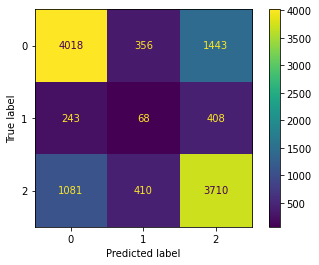

Classification report:
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      5817
         1.0       0.08      0.09      0.09       719
         2.0       0.67      0.71      0.69      5201

    accuracy                           0.66     11737
   macro avg       0.50      0.50      0.50     11737
weighted avg       0.67      0.66      0.67     11737



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')


Stacking model using xgb, bagging, randomforest and adaboost pipelines. Utilize parameters that were optimized during earlier models.

In [ ]:

# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import StackingClassifier
xgb_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('select', SelectKBest(k=20)),
    ('clf', XGBClassifier(learning_rate=1, max_depth=7, n_estimators=50))
])

bagging_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', BaggingClassifier(bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10))
])
rf_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=200, max_features=3, max_depth=10, criterion='entropy', class_weight={0: 1, 1: 3}))
])

adaboost_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', AdaBoostClassifier(learning_rate=1, n_estimators=100))
])
# Define the stacking model with a logistic regression meta-model
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_pipeline),
        ('bagging', bagging_pipeline),
        ('rf', rf_pipeline),
        ('adaboost', adaboost_pipeline)
    ],
    final_estimator=LogisticRegression()
)
# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the accuracy of the stacking model
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Model Test accuracy: {accuracy:.3f}')

# Evaluate the recall score of the stacking model
recall = recall_score(y_test, y_pred, average='macro')
print(f'Stacking Model Test recall score: {recall:.3f}')



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Model Test accuracy: 0.695
Stacking Model Test recall score: 0.494


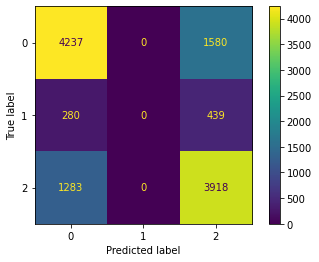

Classification report:
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      5817
         1.0       0.00      0.00      0.00       719
         2.0       0.66      0.75      0.70      5201

    accuracy                           0.69     11737
   macro avg       0.46      0.49      0.48     11737
weighted avg       0.65      0.69      0.67     11737



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

**Results**

In [3]:
import pandas as pd
data = [
    ["Basic Logistic regression", "0.65", "0.69", "0.67"],
    ["Tuned logistic regression", "0.69", "0.58", "0.63"],
    ["Logistic kbest", "0.69", "0.58", "0.63"],
    ["random forest", "0.70", "0.62", "0.65"],
    ["bagging", "0.66", "0.70", "0.68"],
    ["knn", "0.66", "0.70", "0.68"],
    ["adaboost", "0.66", "0.70", "0.68"],
    ["gradient boost", "0.67", "0.66", "0.67"],
    ["Stacking", "0.73", "0.72", "0.72"]
]

columns = ["Model", "Precision", "Recall", "F1-Score"]

df = pd.DataFrame(data, columns=columns)

print(df)


                       Model Precision Recall F1-Score
0  Basic Logistic regression      0.65   0.69     0.67
1  Tuned logistic regression      0.69   0.58     0.63
2             Logistic kbest      0.69   0.58     0.63
3              random forest      0.70   0.62     0.65
4                    bagging      0.66   0.70     0.68
5                        knn      0.66   0.70     0.68
6                   adaboost      0.66   0.70     0.68
7             gradient boost      0.67   0.66     0.67
8                   Stacking      0.73   0.72     0.72


Conclusions & Recommendations:

Based on the classification reports, it appears that the basic logistic regression, bagging, and knn models all performed similarly with an accuracy score of around 70%. However, these models fail to predict for the minority class '1' at all while tuned logistic regression, logistic kbest, random forest, and gradient boost models all had lower accuracy scores but did successfully predict for value '1' of target.

Overall, it seems that these techniques were not very successful in the multiclass approach. Bagging and knn models may be the best choices for this particular dataset due to highest accuracy scores and precision and recall scores above 0.7 for all three classes, however, it's worth noting the next notebook for Binary approach improves on this multiclass approach.